# Backprop KMNIST Practice
> Without peeking

In [ ]:
import numpy as np
import torch
import torchvision
from matplotlib import pyplot
from matplotlib.pyplot import plot as plt

/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
torch.manual_seed(42)

<torch._C.Generator>

## Download KMNIST Dataset

In [ ]:
data_train = torchvision.datasets.KMNIST(root='data', download=True)
x_train, y_train = data_train.train_data, data_train.train_labels

data_test = torchvision.datasets.KMNIST(root='data', train=False, download=True)
x_test, y_test = data_test.test_data, data_test.test_labels

/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/anubhavmaity/mambaforge/envs/fastai/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


<matplotlib.image.AxesImage>

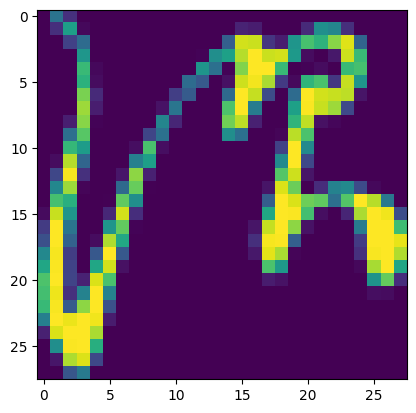

In [ ]:
pyplot.imshow(x_test[0])

## KMNIST Data Analysis and Processing

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([60000, 28, 28]),
 torch.Size([60000]),
 torch.Size([10000, 28, 28]),
 torch.Size([10000]))

Flatten the `x_train` and `x_test`. Convert them to floating points

In [ ]:
x_train, x_test = x_train.flatten(1) / 255., x_test.flatten(1) / 255.

In [ ]:
x_train.shape, x_test.shape

(torch.Size([60000, 784]), torch.Size([10000, 784]))

In [ ]:
n = y_train.shape[0]
c = y_train.max().numpy() + 1
nh = 50 # number of hidden layers
n, c

(60000, 10)

## Weights & Biases

In [ ]:
w1 = torch.randn(x_train.shape[1], nh)
b1 = torch.zeros(nh)
w2 = torch.randn(nh, 1)
b2 = torch.zeros(1)

In [ ]:
w1.shape, b1.shape, w2.shape, b2.shape

(torch.Size([784, 50]), torch.Size([50]), torch.Size([50, 1]), torch.Size([1]))

## Forward Pass

In [ ]:
def forward_pass(x_train, params):
    w1, b1, w2, b2 = params
    output_1 = x_train @ w1 + b1 # first layer
    return output_1 @ w2 + b2 # second layer

In [ ]:
params = w1, b1, w2, b2

In [ ]:
y_pred = forward_pass(x_train, params)
y_pred.shape

torch.Size([60000, 1])

## Loss: MSE

In [ ]:
y_train.shape, y_pred.shape

(torch.Size([60000]), torch.Size([60000, 1]))

In [ ]:
( (y_pred - y_train[:, None]) **2 ).mean()

tensor(5882.7144)

In [ ]:
def mse_loss(y_pred, y_train):
    return ( (y_pred - y_train[:, None]) **2 ).mean()

## Derivatives

In [ ]:
l1 = x_train @ w1 + b1

In [ ]:
l1.shape

torch.Size([60000, 50])

In [ ]:
l2 = l1 @ w2 + b2

In [ ]:
l2.shape

torch.Size([60000, 1])

In [ ]:
diff = (l2 - y_train[:, None]) 

#### Derivative of `mse_loss` with respect to `l2`

In [ ]:
l2.grad = 2 * diff / l2.shape[0] 

#### Derivative of `l2` with respect to `l1`

In [ ]:
l2.grad.shape

torch.Size([60000, 1])

In [ ]:
w2.shape

torch.Size([50, 1])

In [ ]:
l1.shape

torch.Size([60000, 50])

In [ ]:
l1.grad = l2.grad @ w2.T

In [ ]:
l1.grad.shape

torch.Size([60000, 50])

#### Derivative of `l2` with respect to `w2`

In [ ]:
w2.shape

torch.Size([50, 1])

In [ ]:
l1.shape

torch.Size([60000, 50])

In [ ]:
l2.grad.shape

torch.Size([60000, 1])

In [ ]:
w2.grad = l1.T @ l2.grad

In [ ]:
w2.grad.shape

torch.Size([50, 1])

#### Derivative of `l2` with respect to `b2`

In [ ]:
b2.shape

torch.Size([1])

In [ ]:
l2.grad.shape

torch.Size([60000, 1])

In [ ]:
b2.grad = l2.grad.sum(0)

## Forward and backward pass

In [ ]:
def forward_backward_pass(x_train, y_train, params):
    # forward pass
    w1, b1, w2, b2 = params
    l1 = x_train @ w1 + b1
    torch.min_clamp
    l2 =  l1 @ w2 + b2
    loss = msed_loss( l2, y_train )
    
    # backward pass
    diff = ( l2 - y_train[:, None] )
    l2.grad = 2 * diff / l2.shape[0]
    l1.grad = l2.grad @ w2.T
    w2.grad = 
    
    
    
